# import my libraries 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# import dataset

In [2]:
df=pd.read_csv(r"C:\Users\lap shop\Desktop\machin\projects\p 1\Admission_Predict.csv")

# data info

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df=df.rename(columns = {'Chance of Admit ':'Chance of Admit'})
df=df.rename(columns = {'LOR ':'LOR'})

In [5]:
df.shape

(400, 9)

In [6]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [7]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

no found data missing 

In [8]:
#  i do not need  Serial No
df.drop(columns= ['Serial No.'], axis=1 , inplace=True )

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
GRE Score,400.0,316.807500,11.473646,290.00,308.00,317.00,325.0000,340.00
TOEFL Score,400.0,107.410000,6.069514,92.00,103.00,107.00,112.0000,120.00
University Rating,400.0,3.087500,1.143728,1.00,2.00,3.00,4.0000,5.00
SOP,400.0,3.400000,1.006869,1.00,2.50,3.50,4.0000,5.00
LOR,400.0,3.452500,0.898478,1.00,3.00,3.50,4.0000,5.00
CGPA,400.0,8.598925,0.596317,6.80,8.17,8.61,9.0625,9.92
Research,400.0,0.547500,0.498362,0.00,0.00,1.00,1.0000,1.00
Chance of Admit,400.0,0.724350,0.142609,0.34,0.64,0.73,0.8300,0.97


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


 - my data is int or float 
 - no found cat data 
 - no found missing value

In [11]:
df.skew()

GRE Score           -0.062893
TOEFL Score          0.057216
University Rating    0.171260
SOP                 -0.275761
LOR                 -0.106991
CGPA                -0.065991
Research            -0.191582
Chance of Admit     -0.353448
dtype: float64

- Serial No.: 0.000000 (perfectly symmetric, no skewness)
- GRE Score: -0.062893 (slightly negatively skewed)
- TOEFL Score: 0.057216 (slightly positively skewed)
- University Rating: 0.171260 (slightly positively skewed)
- SOP: -0.275761 (moderately negatively skewed)
- LOR: -0.106991 (slightly negatively skewed)
- CGPA: -0.065991 (slightly negatively skewed)
- Research: -0.191582 (moderately negatively skewed)
- Chance of Admit: -0.353448 (moderately negatively skewed)

# Traget value 

Chance of Admit

In [12]:
df['Chance of Admit'].describe()

count    400.000000
mean       0.724350
std        0.142609
min        0.340000
25%        0.640000
50%        0.730000
75%        0.830000
max        0.970000
Name: Chance of Admit, dtype: float64

- our target value is continuous variable with range0.3400 to 0.97000
- The average Chance of Admit  in our dataset is 0.724350

C:\Users\lap shop\AppData\Local\Temp\ipykernel_11584\3616695406.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Chance of Admit']).set_title('Probability Distribution of Chance of Admit', size='20')


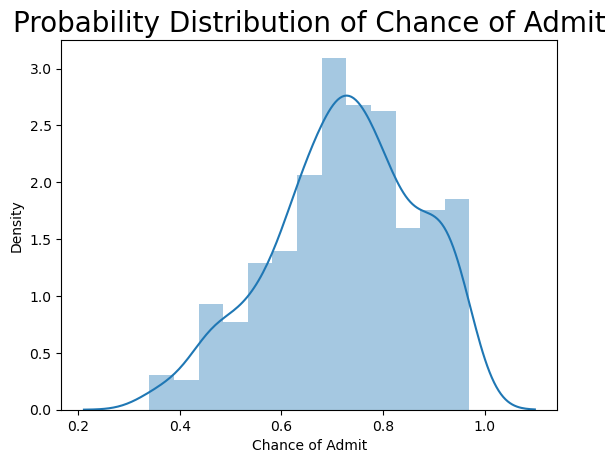

In [13]:
df['Chance of Admit']
sns.distplot(df['Chance of Admit']).set_title('Probability Distribution of Chance of Admit', size='20')
plt.show()

# univariate analysis

Text(0.5, 0, 'Rating')

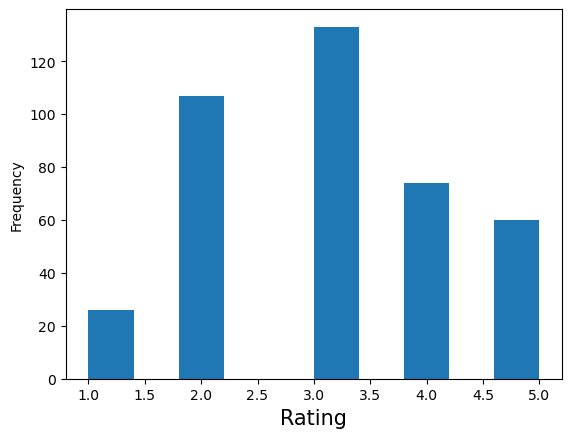

In [14]:
df["University Rating"].plot.hist()
plt.xlabel("Rating", fontdict={'fontsize': 15})


Most students geting rating between 3 to 3.5 

In [15]:
df['Research'].value_counts()

Research
1    219
0    181
Name: count, dtype: int64

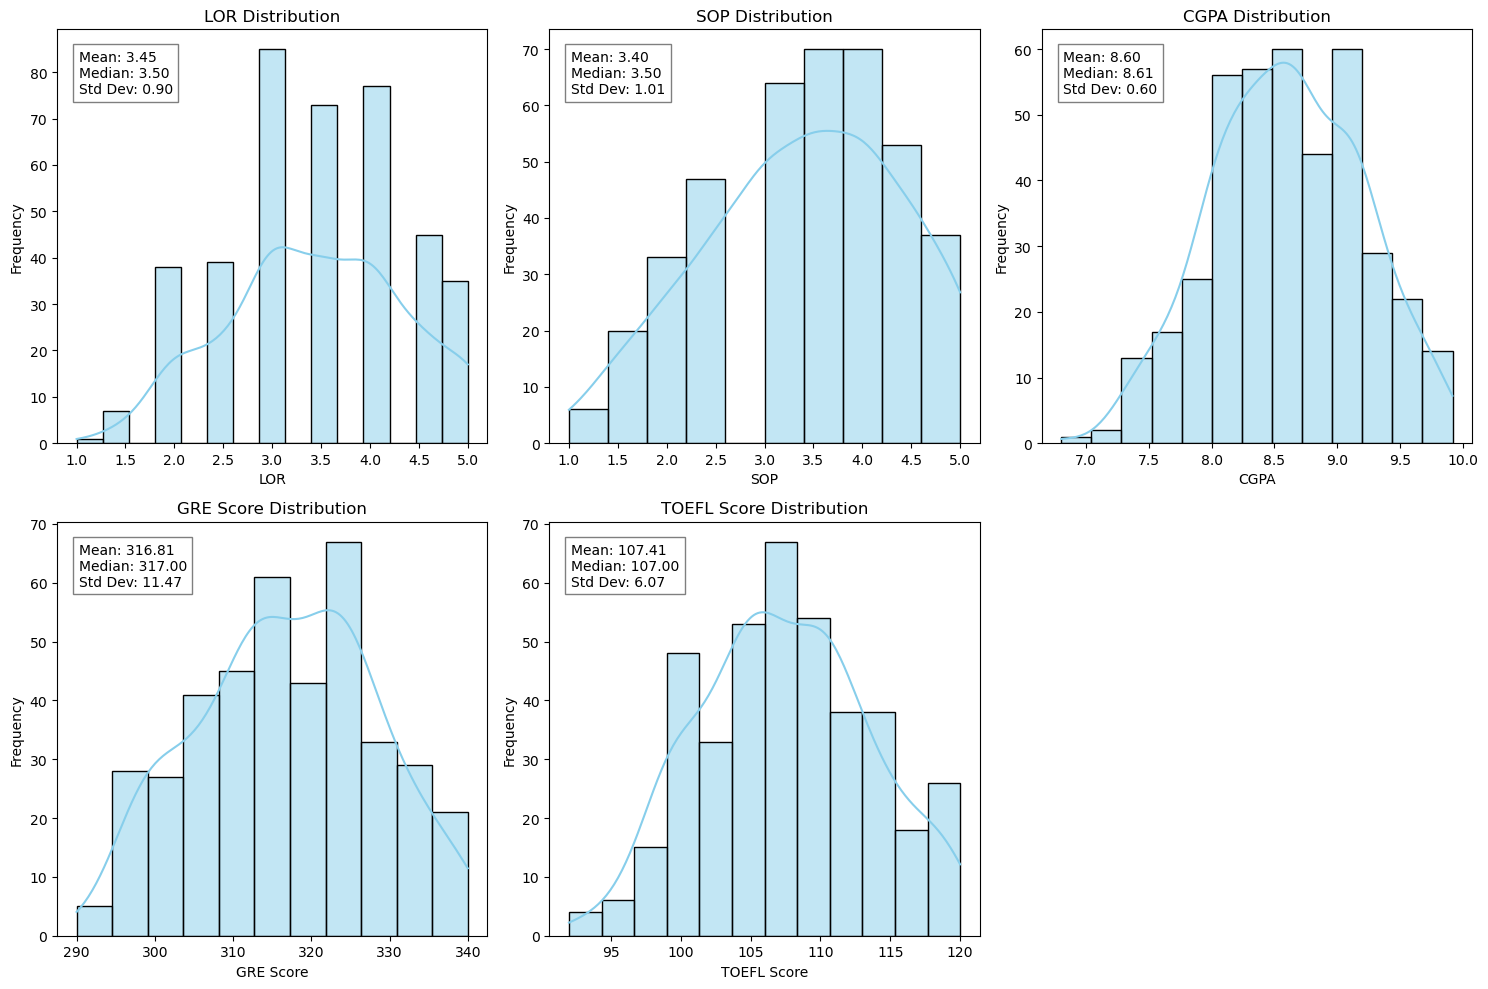

In [16]:


features = ['LOR', 'SOP', 'CGPA', 'GRE Score', 'TOEFL Score']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True, color='skyblue')
    plt.title(f'{feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    
    plt.text(0.05, 0.95, f"Mean: {df[feature].mean():.2f}\nMedian: {df[feature].median():.2f}\nStd Dev: {df[feature].std():.2f}", 
             transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
    
plt.tight_layout()
plt.show()


# Numerical Analysis

- it is Research Experiences should be object
- University Rating having int data type consists of discrete values
-  it's better to change it into categorical variables that will help us in better analysis.


In [17]:
int_to_obj=['Research','University Rating']
for feat in int_to_obj : 
    df[feat]=df[feat].astype(object)

C:\Users\lap shop\AppData\Local\Temp\ipykernel_11584\540221342.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['Chance of Admit'] = df['Chance of Admit']


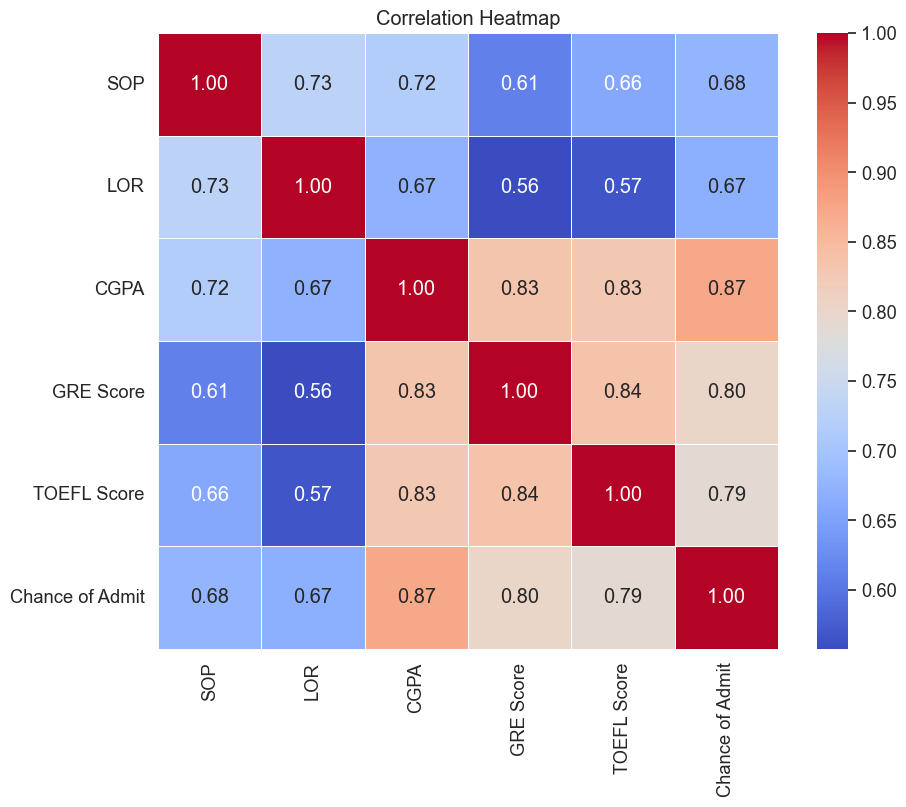

In [18]:
num=['SOP','LOR','CGPA','GRE Score','TOEFL Score']
#First ten features

df_corr = df[num]
df_corr['Chance of Admit'] = df['Chance of Admit']
corr = df_corr.corr()


fig = plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, linecolor='white')
plt.title('Correlation Heatmap')
plt.show()

- Statement of Purpose and Letter of Recommendation Strength is having a positive correlation of 0.68 with Chance of Admit  
- "Letter of Recommendation is having a positive correlation of 0.67 with Chance of Admit  
- "GRE score  is having a positive correlation of 0.67 with Chance of Admit  
- "TOEFL score  is having a positive correlation of 0.67 with Chance of Admit 
- "Undergraduate GPA is having a positive correlation of 0.87 with Chance of Admit , It is the  most affects Chance of Admit 



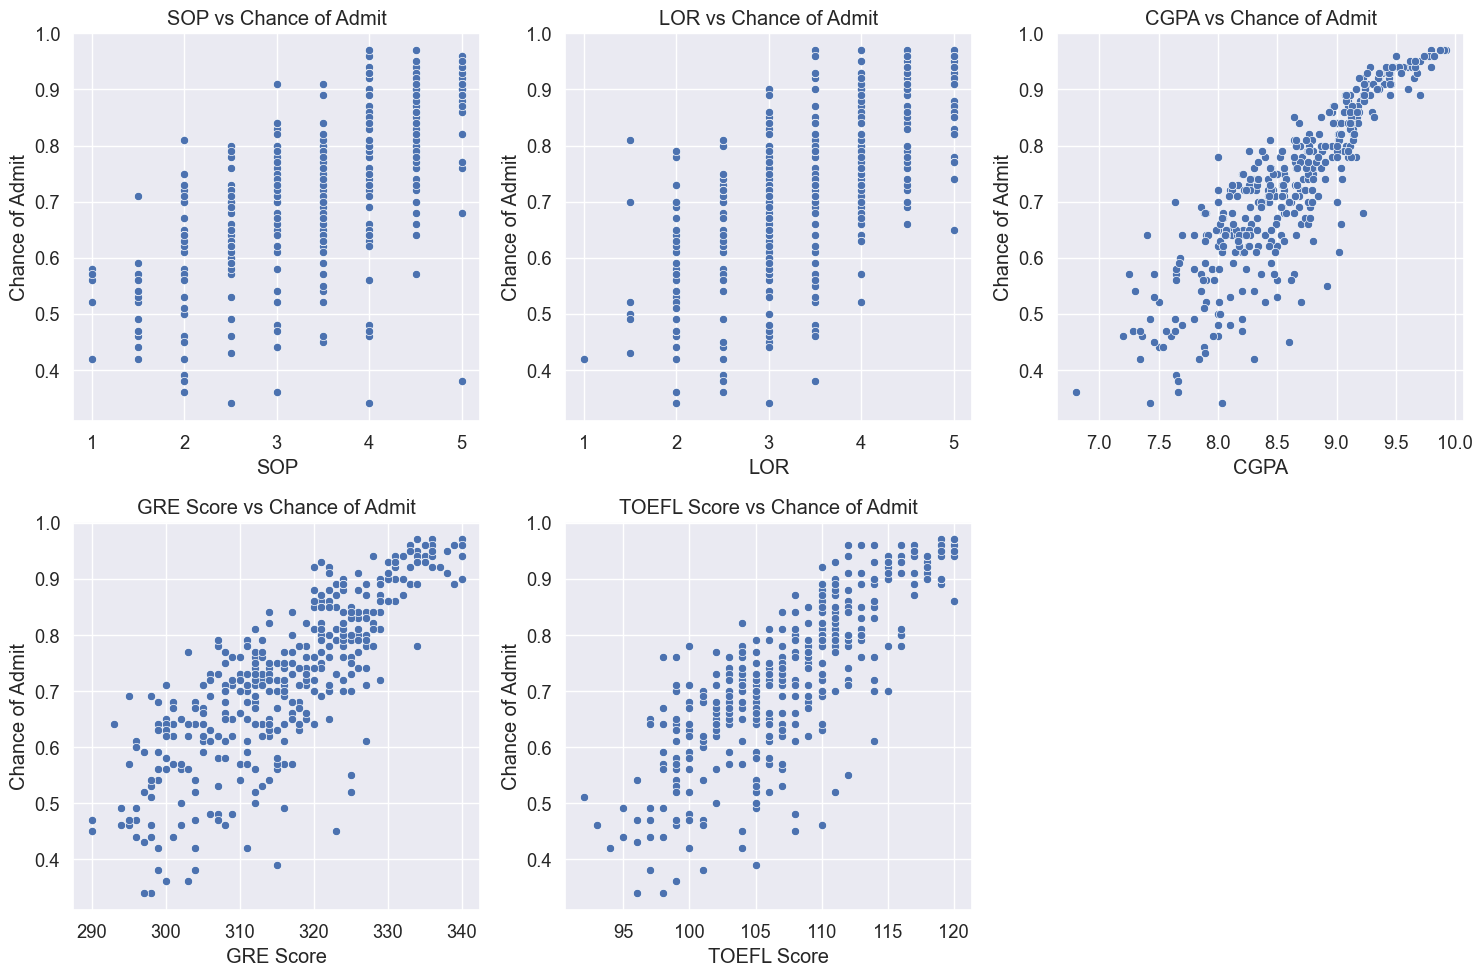

In [19]:

target = 'Chance of Admit'

# Plotting scatterplots
plt.figure(figsize=(15, 10))
for i, feature in enumerate(num, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=df[feature], y=df[target])
    plt.title(f'{feature} vs {target}')
    plt.xlabel(feature)
    plt.ylabel(target)

plt.tight_layout()
plt.show()


# Categorical Analysis


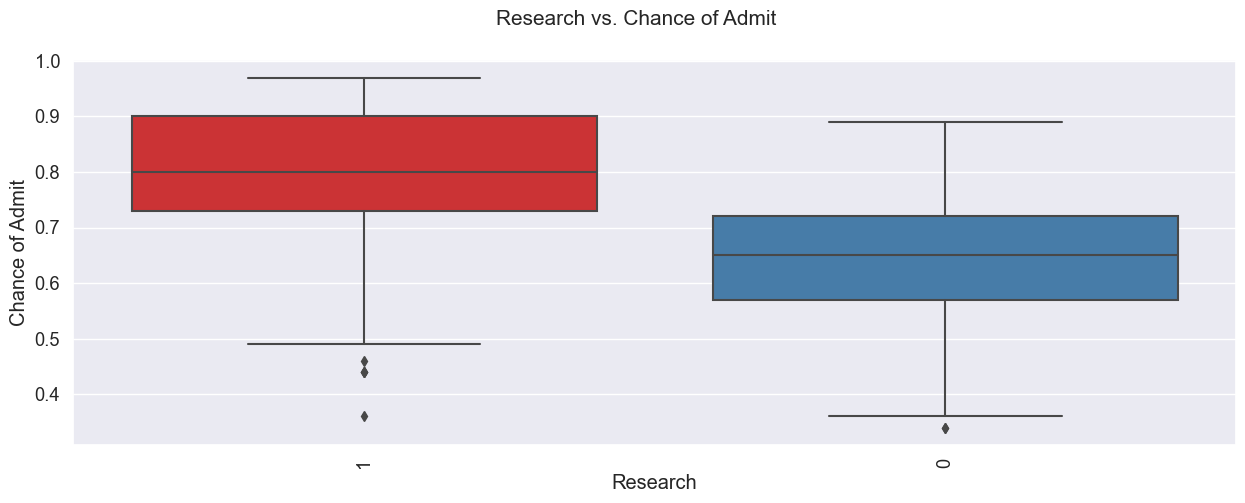

In [20]:
fig = plt.figure(figsize=(15, 5))

table = df.groupby(['Research'], as_index=False)['Chance of Admit'].median().sort_values(by='Chance of Admit', ascending=False)
ax = sns.boxplot(data=df, x="Research", y="Chance of Admit", order=table['Research'].tolist(), palette="Set1")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
fig.suptitle("Research vs. Chance of Admit", fontsize=15)
plt.show()


Doing research gives a greater chance of acceptance

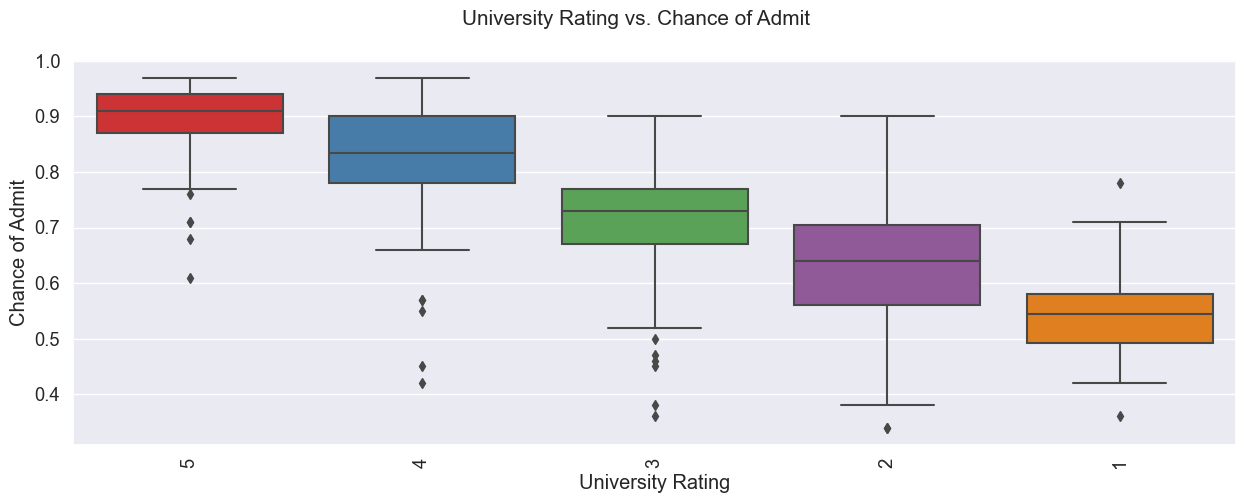

In [21]:
fig = plt.figure(figsize=(15, 5))
df['GRE Score Binned'] = pd.cut(df['GRE Score'], bins=10)  # Adjust the number of bins as needed

table = df.groupby(['University Rating'], as_index=False)['Chance of Admit'].median().sort_values(by='Chance of Admit', ascending=False)
ax = sns.boxplot(data=df, x="University Rating", y="Chance of Admit", order=table['University Rating'].tolist(), palette="Set1")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
fig.suptitle("University Rating vs. Chance of Admit", fontsize=15)
plt.show()


The higher the rating, the greater your chance of acceptance